In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family']='Microsoft YaHei' #显示中文标签
%matplotlib inline

In [7]:

air_data = pd.read_csv(r"D:\Amy\airdata\air_data.csv",encoding='utf-8')


In [3]:
air_data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [8]:
# percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）
explore = air_data.describe(percentiles=[],include='all').T
# describe()函数自动计算非空值数，需要手动计算空值数
explore['null'] = len(air_data)-explore['count']

explore = explore[['null', 'max', 'min']]
# # 表头重命名
explore.columns = [u'空值数', u'最大值', u'最小值']
explore

,空值数,最大值,最小值
MEMBER_NO,0.0,62988.0,1.0
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0.0,6.0,4.0
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420.0,110.0,6.0
LOAD_TIME,0,NaN,NaN


In [9]:
explore = air_data.describe(percentiles=[0.25,0.5,0.75,0.9],include='all').T
explore

#include='all' ,计算离散值、连续型变量的所有描述性统计值


,count,unique,top,freq,mean,std,min,25%,50%,75%,90%,max
MEMBER_NO,62988.0,NaN,NaN,NaN,31494.5,18183.213715,1.0,15747.75,31494.5,47241.25,56689.3,62988.0
FFP_DATE,62988,3068,2011/1/13,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/2/16,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988.0,NaN,NaN,NaN,4.102162,0.373856,4.0,4.0,4.0,4.0,4.0,6.0
WORK_CITY,60719,3309,广州,9385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1183,广东,17507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,62568.0,NaN,NaN,NaN,42.476346,9.885915,6.0,35.0,41.0,48.0,56.0,110.0
LOAD_TIME,62988,1,2014/3/31,62988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '各年份会员入会人数')

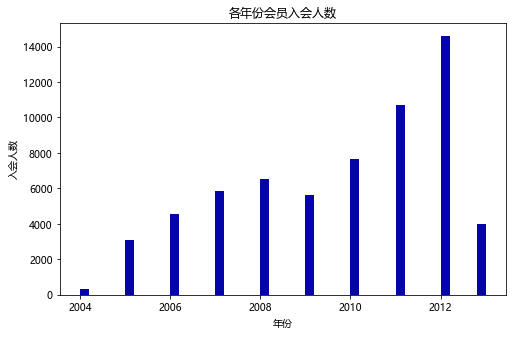

In [10]:
from datetime import datetime

# 提取入会年份,apply将一个函数作用于DataFrame中的每个行或者列
ffp = air_data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
# map应用于Series结构中的每个元素
ffp_year = ffp.map(lambda x : x.year)

# 绘制各年份会员入会人数直方图
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')

Text(0.5, 1.0, '会员性别比例')

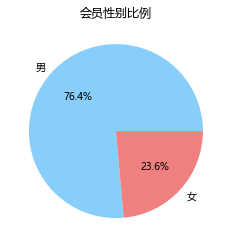

In [11]:
# 提取会员不同性别人数
male = pd.value_counts(air_data['GENDER'])['男']
female = pd.value_counts(air_data['GENDER'])['女']

fig = plt.figure(figsize=(7,4))
# autopct 控制饼图内百分比设置
plt.pie([male,female],labels=['男','女'],
                 colors=['lightskyblue', 'lightcoral'],
                 autopct='%1.1f%%')

plt.title('会员性别比例')

Text(0.5, 1.0, '会员各级别人数')

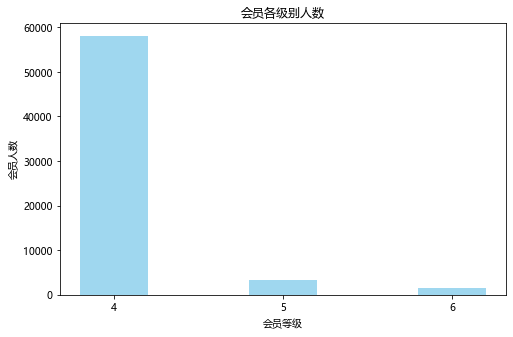

In [12]:
lv_four = pd.value_counts(air_data['FFP_TIER'])[4]
lv_five = pd.value_counts(air_data['FFP_TIER'])[5]
lv_six = pd.value_counts(air_data['FFP_TIER'])[6]

fig = plt.figure(figsize = (8 ,5))
plt.bar(range(3), height=[lv_four,lv_five,lv_six],
                    width=0.4, alpha=0.8, color='skyblue')
plt.xticks([index for index in range(3)], ['4','5','6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员各级别人数')

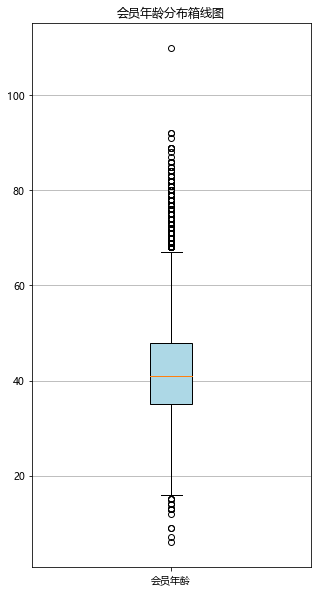

In [13]:
age = air_data['AGE'].dropna()
age = age.astype('int64')
# 绘制会员年龄分布箱型图
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(age, 
            patch_artist=True,
            labels = ['会员年龄'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员年龄分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')


#可以看出大部分会员年龄集中在30～50岁之间，极少量的会员年龄小于20岁或高于60岁，且存在一个超过100岁的异常数据

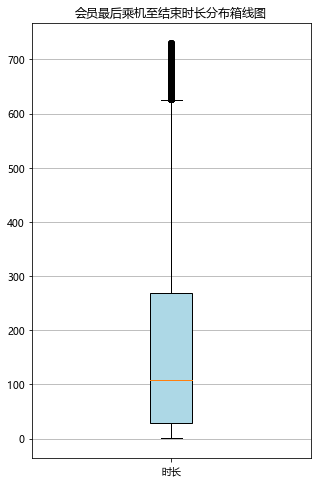

In [14]:
# 乘机信息类别
lte = air_data['LAST_TO_END']
fc = air_data['FLIGHT_COUNT']
sks = air_data['SEG_KM_SUM']

fig = plt.figure(figsize = (5 ,8))
plt.boxplot(lte, 
            patch_artist=True,
            labels = ['时长'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员最后乘机至结束时长分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')

#客户的入会时长主要分布在50～300区间内，另外有一部分客户群体的入会时长分布在600以上的区间，可分为两个群体

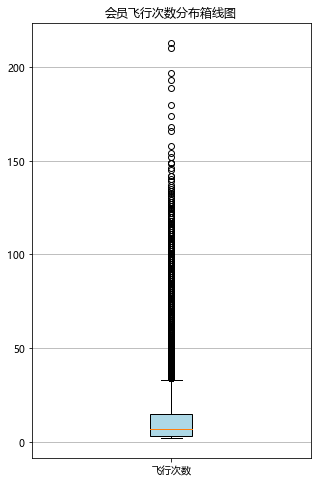

In [15]:
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(fc, 
            patch_artist=True,
            labels = ['飞行次数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员飞行次数分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')

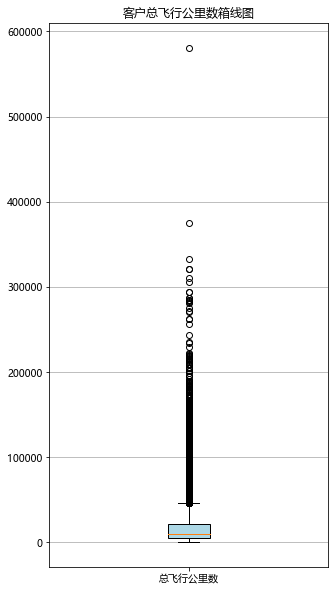

In [16]:
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(sks, 
            patch_artist=True,
            labels = ['总飞行公里数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总飞行公里数箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')

In [ ]:
总飞行次数与总飞行里程可分为两个群体，大部分客户集中在箱型图下方，少部分客户散落在箱线图上界的上方，这部分客户可能属于高价值客户。
因为其飞行次数与飞行总里程明显高于其他用户

In [17]:
ec = air_data['EXCHANGE_COUNT']

In [15]:
ec

0        34
1        29
2        20
3        11
4        27
         ..
62983     1
62984    14
62985     0
62986     0
62987     0
Name: EXCHANGE_COUNT, Length: 62988, dtype: int64

Text(0.5, 1.0, '会员兑换积分次数分布直方图')

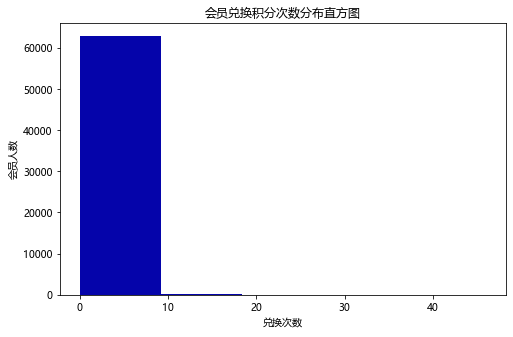

In [19]:
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.hist(ec, bins=5, color='#0504aa')
plt.xlabel('兑换次数')
plt.ylabel('会员人数')
plt.title('会员兑换积分次数分布直方图')

#绘制会员兑换积分次数直方图,绝大部分客户的兑换次数在0～10的区间内，这表示大部分客户都很少进行积分兑换

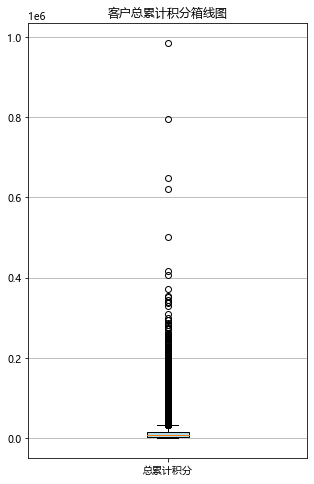

In [20]:
# 提取会员总累计积分
ps = air_data['Points_Sum']

fig = plt.figure(figsize = (5 ,8))
plt.boxplot(ps, 
            patch_artist=True,
            labels = ['总累计积分'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总累计积分箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')

In [29]:
data_corr = air_data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END', 'SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]

# FFP_TIER  入会时间
# FLIGHT_COUNT 总飞行次数
# LAST_TO_END  最后一次乘机至观察窗口时长
# SEG_KM_SUM  观察窗口期的总飞行里数
# EXCHANGE_COUNT 积分兑换次数
# Points_Sum  总积分数

#缺失值填补

age1 = air_data['AGE'].fillna(0)





In [37]:
data_corr

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum
0,6,210,1,580717,34,619760
1,6,140,7,293678,29,415768
2,6,135,11,283712,20,406361
3,5,23,97,281336,11,372204
4,6,152,5,309928,27,338813
...,...,...,...,...,...,...
62983,4,2,297,1134,1,12318
62984,4,4,89,8016,14,106972
62985,4,2,29,2594,0,0
62986,4,2,400,3934,0,0


In [42]:
age1

0        31.0
1        42.0
2        40.0
3        64.0
4        48.0
         ... 
62983    25.0
62984    38.0
62985    43.0
62986    36.0
62987    29.0
Name: AGE, Length: 62988, dtype: float64

In [44]:
age1.describe()

count    62988.000000
mean        42.193116
std         10.441751
min          0.000000
25%         35.000000
50%         41.000000
75%         48.000000
max        110.000000
Name: AGE, dtype: float64

In [45]:
age1.unique()

array([ 31.,  42.,  40.,  64.,  48.,  46.,  50.,  43.,  34.,  47.,  58.,
        45.,  63.,  54.,  41.,  49.,   0.,  69.,  39.,  62.,  55.,  53.,
        37.,  51.,  59.,  76.,  38.,  60.,  52.,  44.,  30.,  33.,  28.,
        67.,  57.,  35.,  70.,  66.,  56.,  61.,  36.,  78.,  32.,  74.,
        68.,  65.,  27.,  72.,  71.,  79.,  25.,  29.,  21.,  26.,  18.,
        19.,  73.,  77.,  15.,  16.,  75.,  24.,  12.,  23.,  14.,  81.,
        20.,  22.,  89.,  80.,  17.,  83.,  82.,  84.,  13.,  86., 110.,
         7.,  85.,  87.,   6.,  92.,  88.,   9.,  91.])

In [23]:
age1[age1==0].count()

420

In [24]:
age1[age1==0].index()

TypeError: 'Int64Index' object is not callable

In [25]:
data_corr.loc[:,'AGE'] = age1.astype('int64')
#在原先数据基础上在加一列AGE
data_corr.loc[:,'ffp_year'] = ffp_year

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [55]:
data_corr

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum,AGE,ffp_year
0,6,210,1,580717,34,619760,31,2006
1,6,140,7,293678,29,415768,42,2007
2,6,135,11,283712,20,406361,40,2007
3,5,23,97,281336,11,372204,64,2008
4,6,152,5,309928,27,338813,48,2009
...,...,...,...,...,...,...,...,...
62983,4,2,297,1134,1,12318,25,2011
62984,4,4,89,8016,14,106972,38,2010
62985,4,2,29,2594,0,0,43,2006
62986,4,2,400,3934,0,0,36,2013


In [26]:
# 计算相关性矩阵
dt_corr = data_corr.corr(method = 'pearson')
print('相关性矩阵为：\n',dt_corr)


相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610

<AxesSubplot:>

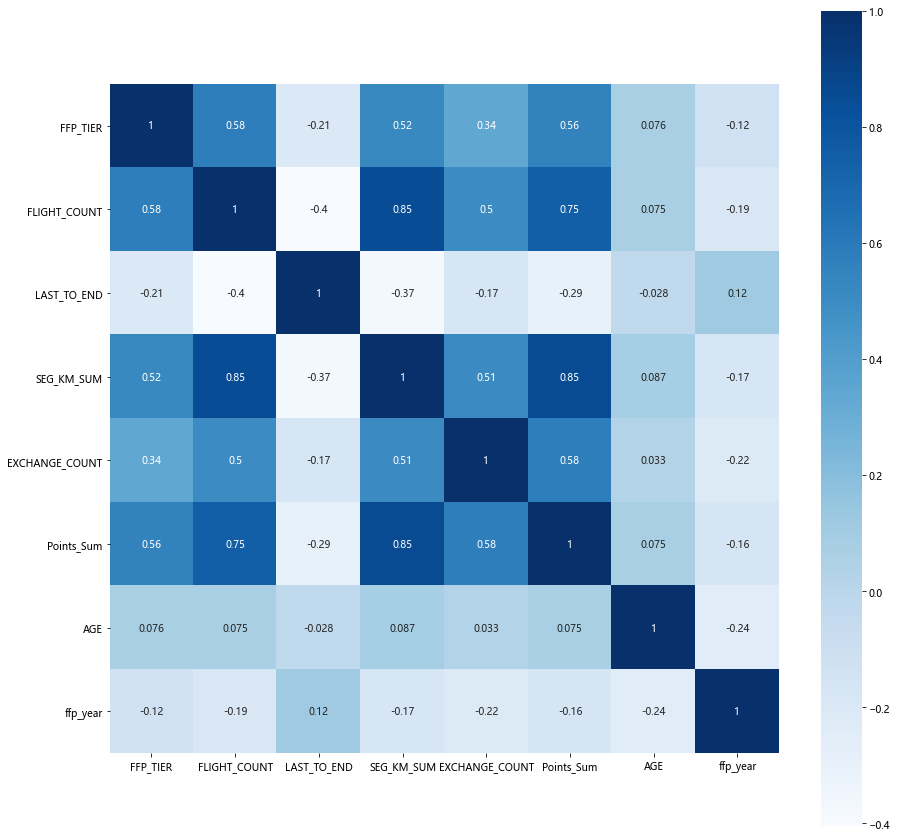

In [27]:
#绘制相关性矩阵热力图
plt.subplots(figsize=(15,15))
sns.heatmap(dt_corr,annot=True, vmax=1, square=True, cmap='Blues')

In [28]:
#筛选数据，丢弃票价为空的记录，保留票价不为0且飞行总里程大于0的记录
#丢弃年龄大于100的记录







NameError: name 'airline_data' is not defined

In [62]:
air_data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62988.0,62988.000000,62437.000000,62850.000000,62988.000000,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,0.0,265.689623,5355.376064,5604.026014,17123.878691,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,0.0,1645.702854,8109.450147,8703.364247,20960.844623,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,0.0,0.000000,1003.000000,780.000000,4747.000000,...,0.000000,0.000000,0.000000,2775.0000,700.000000,0.250000,0.288889,0.258150,0.167954,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,0.0,0.000000,2800.000000,2773.000000,9994.000000,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,0.0,0.000000,6574.000000,6845.750000,21271.250000,...,0.000000,345.000000,0.000000,14302.5000,7500.000000,0.711111,0.750000,0.815091,0.728375,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


In [104]:
airline_notnull = air_data.loc[air_data['SUM_YR_1'].notnull() & 
                                   air_data['SUM_YR_2'].notnull(),:]


In [66]:
airline_notnull

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,2013/1/20,2013/1/20,女,4,北京,.,CN,35.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0
62983,18375,2011/5/20,2013/6/5,女,4,广州,广东,CN,25.0,2014/3/31,...,12318,12318,12123,12318,12123,1.000000,0.000000,0.000000,0.000000,22
62984,36041,2010/3/8,2013/9/14,男,4,佛山,广东,CN,38.0,2014/3/31,...,106972,106972,56506,106972,56506,1.000000,0.000000,0.000000,0.000000,43
62985,45690,2006/3/30,2006/12/2,女,4,广州,广东,CN,43.0,2014/3/31,...,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0


In [31]:
air_data['SUM_YR_1'].notnull()

0         True
1         True
2         True
3         True
4         True
         ...  
62983     True
62984     True
62985     True
62986     True
62987    False
Name: SUM_YR_1, Length: 62988, dtype: bool

In [32]:
air_data['SUM_YR_2'].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
62983    True
62984    True
62985    True
62986    True
62987    True
Name: SUM_YR_2, Length: 62988, dtype: bool

In [33]:
air_data['SUM_YR_1'].notnull() & air_data['SUM_YR_2'].notnull()

#返回index值

0         True
1         True
2         True
3         True
4         True
         ...  
62983     True
62984     True
62985     True
62986     True
62987    False
Length: 62988, dtype: bool

In [34]:
airline_notnull = air_data.loc[air_data['SUM_YR_1'].notnull() & air_data['SUM_YR_2'].notnull(),:]

In [72]:
print('删除缺失记录后数据的形状为：\n',airline_notnull.shape)

删除缺失记录后数据的形状为：
 (62299, 44)


In [73]:
print('删除缺失记录后数据的形状为：',airline_notnull.shape)

删除缺失记录后数据的形状为： (62299, 44)


In [35]:
index1 = airline_notnull['SUM_YR_1'] != 0

In [75]:
index1

0         True
1         True
2         True
3         True
4         True
         ...  
62982    False
62983    False
62984    False
62985    False
62986    False
Name: SUM_YR_1, Length: 62299, dtype: bool

In [36]:
index2 = airline_notnull['SUM_YR_2'] != 0

In [37]:
index3 = (airline_notnull['SEG_KM_SUM']> 0) & (airline_notnull['avg_discount'] != 0)

In [38]:
index4 = airline_notnull['AGE'] > 100  # 去除年龄大于100的记录
index5 = airline_notnull['AGE'] <= 100  # 去除年龄大于100的记录

In [39]:
airline = airline_notnull[(index1 | index2) & index3 & ~index4]
airline1 = airline_notnull[(index1 | index2) & index3 & index5]

In [80]:
airline

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/5/8,2005/8/26,男,4,NaN,NaN,CN,34.0,2014/3/31,...,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/3/31,...,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/7/8,2011/6/21,男,4,贵阳市,贵州省,CN,33.0,2014/3/31,...,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [84]:
airline

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/5/8,2005/8/26,男,4,NaN,NaN,CN,34.0,2014/3/31,...,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/3/31,...,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/7/8,2011/6/21,男,4,贵阳市,贵州省,CN,33.0,2014/3/31,...,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [87]:
#保存筛选过的数据
airline.to_csv(r"D:\Amy\airdata\cleanedfile.csv")

In [ ]:
# rfm模型
# r:最近一次消费时间与截止时间的间隔 
# f:某段时间的消费总次数
# m：某段时间消费的总金额  消费金额由于受航线里程、折扣等因素，所以一般的我们认为长航线、低等级的用户没有短航线、高舱位等级的用户有优势
# 用总飞行里程 与 折扣平均值替代 

#另外航空公司入会长短也会短少影响客户价值，所以将该指标作为关系长度L


In [40]:
airline_selection = airline[['FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
airline_selection.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/2,2014/3/31,1,210,580717,0.961639
1,2007/2/19,2014/3/31,7,140,293678,1.252314
2,2007/2/1,2014/3/31,11,135,283712,1.254676
3,2008/8/22,2014/3/31,97,23,281336,1.090870
4,2009/4/10,2014/3/31,5,152,309928,0.970658


In [41]:
#L=会员入会时长
L = pd.to_datetime(airline_selection['LOAD_TIME']) - pd.to_datetime(airline_selection['FFP_DATE'])

In [90]:
L

0       2706 days
1       2597 days
2       2615 days
3       2047 days
4       1816 days
           ...   
62974   3249 days
62975   1961 days
62976   1362 days
62977    466 days
62978   1082 days
Length: 62043, dtype: timedelta64[ns]

In [42]:
L.astype('str').str.split()

0        [2706, days]
1        [2597, days]
2        [2615, days]
3        [2047, days]
4        [1816, days]
             ...     
62974    [3249, days]
62975    [1961, days]
62976    [1362, days]
62977     [466, days]
62978    [1082, days]
Length: 62043, dtype: object

In [43]:
L.astype('str')

0        2706 days
1        2597 days
2        2615 days
3        2047 days
4        1816 days
           ...    
62974    3249 days
62975    1961 days
62976    1362 days
62977     466 days
62978    1082 days
Length: 62043, dtype: object

In [44]:
L.astype('str').str.split()

0        [2706, days]
1        [2597, days]
2        [2615, days]
3        [2047, days]
4        [1816, days]
             ...     
62974    [3249, days]
62975    [1961, days]
62976    [1362, days]
62977     [466, days]
62978    [1082, days]
Length: 62043, dtype: object

In [48]:
L.astype('str').str.split()[0]

['2706']

In [49]:
L=L.astype('str').str.split().str[0]

In [50]:
L = L.astype('int')/30

# 构造维度变量，入会时长月份数

In [123]:
type(L)

pandas.core.series.Series

In [53]:
type(airline_selection)

pandas.core.frame.DataFrame

In [132]:
type(pd.DataFrame(L))

pandas.core.frame.DataFrame

In [55]:
airline_features = pd.concat([L,airline_selection.iloc[:,2:]],axis=1)

In [56]:
airline_features.columns = ['L','R','F','M','C']

In [57]:
print('构建的LRFMC属性前5行为：\n',airline_features.head())

构建的LRFMC属性前5行为：
            L   R    F       M         C
0  90.200000   1  210  580717  0.961639
1  86.566667   7  140  293678  1.252314
2  87.166667  11  135  283712  1.254676
3  68.233333  97   23  281336  1.090870
4  60.533333   5  152  309928  0.970658


In [105]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline_features)

In [163]:
data

array([[ 1.44574769, -0.94493902, 14.03402401, 26.76115699,  1.29554188],
       [ 1.30422166, -0.91188564,  9.07321595, 13.12686436,  2.86817777],
       [ 1.33960317, -0.88985006,  8.71887252, 12.65348144,  2.88095186],
       ...,
       [-0.14642012, -0.73560098, -0.7066628 , -0.77233461, -2.68988313],
       [-1.20786532,  1.60567965, -0.7066628 , -0.77983958, -2.55462608],
       [-0.46485368,  0.60306065, -0.7066628 , -0.78667955, -2.39231762]])

# k-means聚类

In [59]:
from sklearn.cluster import KMeans  # 导入kmeans算法

In [106]:
# 构建模型，随机种子设为123
k=5
kmeans_model = KMeans(n_clusters = k,n_jobs=4,random_state=123)
fit_kmeans = kmeans_model.fit(data)  # 模型训练

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [107]:
kmeans_cc = kmeans_model.cluster_centers_  # 聚类中心

In [62]:
print('各样本的类别标签为：\n',kmeans_cc)

各样本的类别标签为：
 [[-0.70030628 -0.41502288 -0.16081841 -0.16053724 -0.25728596]
 [ 0.0444681  -0.00249102 -0.23046649 -0.23492871  2.17528742]
 [ 0.48370858 -0.79939042  2.48317171  2.42445742  0.30923962]
 [ 1.1608298  -0.37751261 -0.08668008 -0.09460809 -0.15678402]
 [-0.31319365  1.68685465 -0.57392007 -0.5367502  -0.17484815]]


In [108]:
kmeans_labels = kmeans_model.labels_
print('各样本的类别标签为：\n',kmeans_labels)

各样本的类别标签为：
 [2 2 2 ... 0 4 4]


In [65]:
pd.DataFrame(kmeans_labels.value_counts())

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [67]:
pd.Series(kmeans_labels).value_counts()

0    24630
3    15733
4    12117
2     5337
1     4226
dtype: int64

In [113]:
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,columns = ['ZL','ZR','ZF','ZM','ZC'])   # 将聚类中心放在数据框中
cluster_center.index = pd.DataFrame(kmeans_model.labels_ ).drop_duplicates().iloc[:,0] 
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,,,,,
2,-0.700306,-0.415023,-0.160818,-0.160537,-0.257286
1,0.044468,-0.002491,-0.230466,-0.234929,2.175287
3,0.483709,-0.799390,2.483172,2.424457,0.309240
0,1.160830,-0.377513,-0.086680,-0.094608,-0.156784
4,-0.313194,1.686855,-0.573920,-0.536750,-0.174848


In [69]:
cluster_center.index

Int64Index([2, 1, 3, 0, 4], dtype='int64', name=0)

In [110]:
# 客户分群雷达图
labels = ['ZL','ZR','ZF','ZM','ZC']
legen = [' customers' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
#cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
#centers = np.array(cluster_center.iloc[:, 0:])



In [71]:
legen = [' customers' + str(i + 1) for i in cluster_center.index]
legen

[' customers3', ' customers2', ' customers4', ' customers1', ' customers5']

In [72]:
list(cluster_center.iloc[:,0])

[-0.7003062784634922,
 0.04446810093461334,
 0.48370857831621583,
 1.1608297989066068,
 -0.31319364647166187]

In [73]:
cluster_center.iloc[:,0]

0
2   -0.700306
1    0.044468
3    0.483709
0    1.160830
4   -0.313194
Name: ZL, dtype: float64

In [74]:
n = len(labels)
n

5

In [75]:
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle
#生成等距数列，从0开始，2*pi，结尾，生成五个数（n）

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825])

In [76]:
angle = np.concatenate((angle, [angle[0]]))  #拼接数组，或者数列
angle

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       0.        ])

In [77]:
labels = ['ZL','ZR','ZF','ZM','ZC']

In [78]:
labels = np.concatenate((labels,[labels[0]]))

In [79]:
# 绘图
fig = plt.figure(figsize = (8,6))
plt.show()

<Figure size 576x432 with 0 Axes>

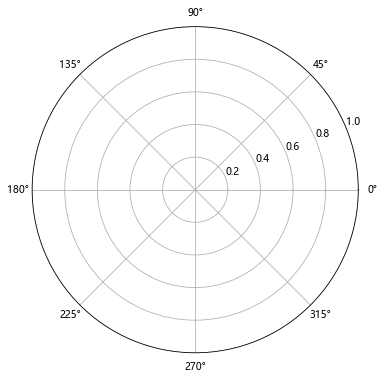

In [80]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, polar=True)  # 以极坐标的形式绘制图形
plt.show()

In [208]:
legen = [' customers' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例

In [209]:
legen

[' customers3', ' customers5', ' customers2', ' customers1', ' customers4']

In [210]:
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']

In [211]:
lstype

['-', '--', (0, (3, 5, 1, 5, 1, 5)), ':', '-.']

In [213]:
lstype=(0,(3, 5, 1, 5, 1, 5))

In [214]:
lstype

(0, (3, 5, 1, 5, 1, 5))

In [215]:
cluster_center

,ZL,ZR,ZF,ZM,ZC,ZL
0,,,,,,
2,-0.314172,1.685521,-0.573946,-0.536727,-0.173179,-0.314172
4,-0.700549,-0.415335,-0.160719,-0.160350,-0.254794,-0.700549
1,0.483978,-0.799318,2.483916,2.425287,0.308966,0.483978
0,1.160203,-0.377133,-0.087234,-0.095293,-0.157127,1.160203
3,0.053020,-0.003239,-0.226587,-0.231590,2.190251,0.053020


In [216]:
cluster_center.iloc[:, 0]

0
2   -0.314172
4   -0.700549
1    0.483978
0    1.160203
3    0.053020
Name: ZL, dtype: float64

In [217]:
cluster_center

,ZL,ZR,ZF,ZM,ZC,ZL
0,,,,,,
2,-0.314172,1.685521,-0.573946,-0.536727,-0.173179,-0.314172
4,-0.700549,-0.415335,-0.160719,-0.160350,-0.254794,-0.700549
1,0.483978,-0.799318,2.483916,2.425287,0.308966,0.483978
0,1.160203,-0.377133,-0.087234,-0.095293,-0.157127,1.160203
3,0.053020,-0.003239,-0.226587,-0.231590,2.190251,0.053020


In [253]:
cluster_center.iloc[:, 0]

0
2   -0.314172
4   -0.700549
1    0.483978
0    1.160203
3    0.053020
Name: ZL, dtype: float64

In [254]:
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,,,,,
2,-0.314172,1.685521,-0.573946,-0.536727,-0.173179
4,-0.700549,-0.415335,-0.160719,-0.160350,-0.254794
1,0.483978,-0.799318,2.483916,2.425287,0.308966
0,1.160203,-0.377133,-0.087234,-0.095293,-0.157127
3,0.053020,-0.003239,-0.226587,-0.231590,2.190251


In [255]:
list(cluster_center.iloc[:, 0])

[-0.3141716307066362,
 -0.7005489493855827,
 0.48397841922003626,
 1.1602032208114792,
 0.053019760506788624]

In [256]:
list(cluster_center.iloc[:, 0])[1]

-0.7005489493855827

In [257]:
list(cluster_center.iloc[:, 0])[2]

0.48397841922003626

In [258]:
cluster_center.iloc[:, 0:]

,ZL,ZR,ZF,ZM,ZC
0,,,,,
2,-0.314172,1.685521,-0.573946,-0.536727,-0.173179
4,-0.700549,-0.415335,-0.160719,-0.160350,-0.254794
1,0.483978,-0.799318,2.483916,2.425287,0.308966
0,1.160203,-0.377133,-0.087234,-0.095293,-0.157127
3,0.053020,-0.003239,-0.226587,-0.231590,2.190251


In [259]:
np.array(cluster_center.iloc[:, 0:])

array([[-0.31417163,  1.68552094, -0.57394614, -0.53672685, -0.17317909],
       [-0.70054895, -0.41533524, -0.16071932, -0.16034986, -0.25479359],
       [ 0.48397842, -0.79931844,  2.48391643,  2.42528691,  0.30896635],
       [ 1.16020322, -0.3771333 , -0.08723365, -0.09529304, -0.15712704],
       [ 0.05301976, -0.00323907, -0.22658732, -0.23159007,  2.19025125]])

In [261]:
np.array(cluster_center.iloc[:, 0:])[1]

array([-0.70054895, -0.41533524, -0.16071932, -0.16034986, -0.25479359])

In [ ]:
list(cluster_center.iloc[:, 0])

In [289]:
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)

In [290]:
angle

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825])

In [291]:
y=np.linspace(1,10,num=10,retstep=True)

In [292]:
y


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 1.0)

In [293]:
angle = np.concatenate((angle, [angle[0]]))

In [294]:
angle

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       0.        ])

In [111]:

centers = np.array(cluster_center.iloc[:, 0:])

In [114]:
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,,,,,
2,-0.700306,-0.415023,-0.160818,-0.160537,-0.257286
1,0.044468,-0.002491,-0.230466,-0.234929,2.175287
3,0.483709,-0.799390,2.483172,2.424457,0.309240
0,1.160830,-0.377513,-0.086680,-0.094608,-0.156784
4,-0.313194,1.686855,-0.573920,-0.536750,-0.174848


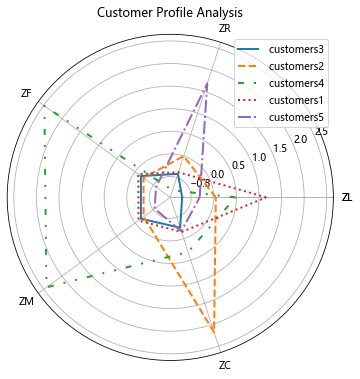

In [115]:
# 分割圆周长，并让其闭合
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
labels = np.concatenate((labels,[labels[0]]))
# 绘图
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, polar=True)  # 以极坐标的形式绘制图形
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号 
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])
# 添加属性标签
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('Customer Profile Analysis')
plt.legend(legen)